## Machine learning prediction of real estate valuation 

### The Objective of Machine Learning Prediction:

The goal of this project is to build a machine learning model that can predict the valuation of real estate according to the information of the house age, the distance to the nearest MRT station, the number of neighboring convenience stores and the geographic coordinates. The real estate valuation dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set.


### The description of the dataset:

This dataset contains 7 attributes and 414 observations. Attributes include:

#### The inputs are as follows:
* X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2=the house age (unit: year)
* X3=the distance to the nearest MRT station (unit: meter)
* X4=the number of convenience stores in the living circle on foot (integer)
* X5=the geographic coordinate, latitude. (unit: degree)
* X6=the geographic coordinate, longitude. (unit: degree)

#### The output is as follow:
* Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
data_path = ['data']
filepath = os.sep.join(data_path + ['Real_estate_valuation_data.csv'])
data = pd.read_csv(filepath)
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Number of rows
print('Rows: {}'.format(data.shape[0]))

# Number of columns
print('Columns: {}'.format(data.shape[1]))

# Column names
print(data.columns.tolist())

# Data types
data.dtypes

Rows: 414
Columns: 8
['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

### Data Cleaning and Feature Engineering:

The dataset was first examined to check whether there are any missing values in attributes.

In [4]:
# Check missing values
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

The analysis result shows that there are no missing values.

Remove first two colums and rename the remaining columns.

In [5]:
data.drop(['No', 'X1 transaction date'], axis=1, inplace=True)
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
data.rename({'X2 house age':'house_age', 
             'X3 distance to the nearest MRT station':'distance_MRT',
             'X4 number of convenience stores':'nearby_stores',
             'X5 latitude':'latitude',
             'X6 longitude':'longitude',
             'Y house price of unit area':'house_price'}, axis=1, inplace=True)
data.head()

,house_age,distance_MRT,nearby_stores,latitude,longitude,house_price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
# Examine the engineered dataset.
print(data.shape)
data.dtypes

(414, 6)


house_age        float64
distance_MRT     float64
nearby_stores      int64
latitude         float64
longitude        float64
house_price      float64
dtype: object

### Data Exploration:

In [8]:
# Statistical summary of the dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
house_age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
distance_MRT,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
nearby_stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
house_price,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [9]:
cols = data.columns.to_list()
cols

['house_age',
 'distance_MRT',
 'nearby_stores',
 'latitude',
 'longitude',
 'house_price']

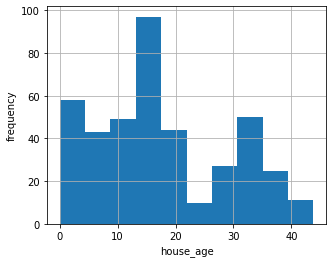

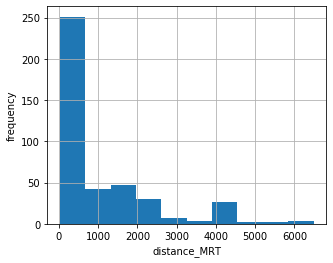

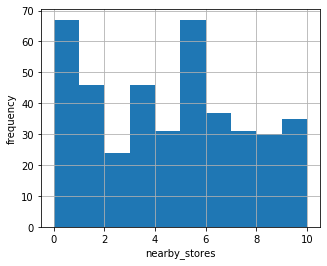

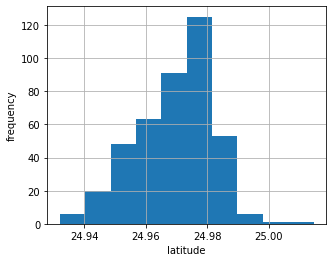

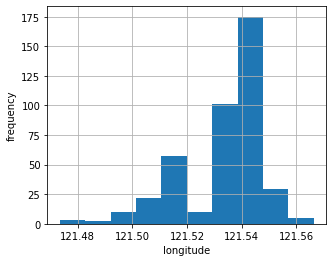

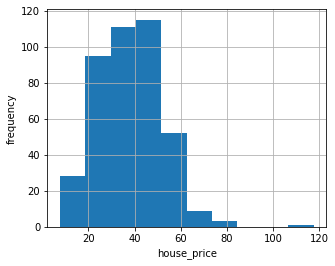

In [10]:
# Plot the data distribution of each feature variable
for col in cols:
    fig, ax = plt.subplots(figsize=(5,4))
    data[col].hist(ax=ax, bins=10).set(xlabel=col, ylabel='frequency');

Use the pairplot of seaborn to examine the correlations between variables.

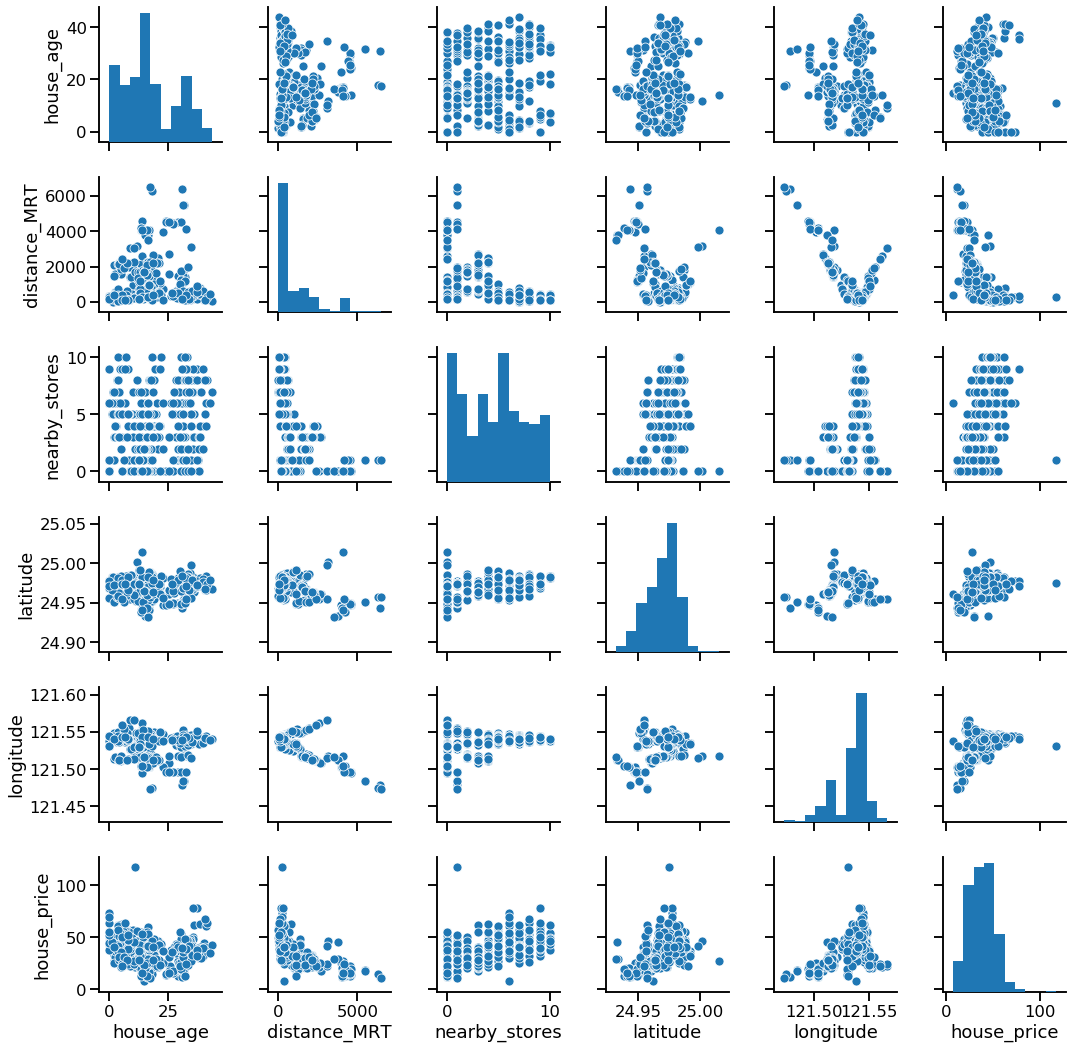

In [11]:
sns.set_context('talk')
sns.pairplot(data);

Examine the correlations between feature variables and house price.

In [12]:
corr = data.iloc[:, :-1].corrwith(data['house_price'])
corr.sort_values(inplace=True)
corr

distance_MRT    -0.673613
house_age       -0.210567
longitude        0.523287
latitude         0.546307
nearby_stores    0.571005
dtype: float64

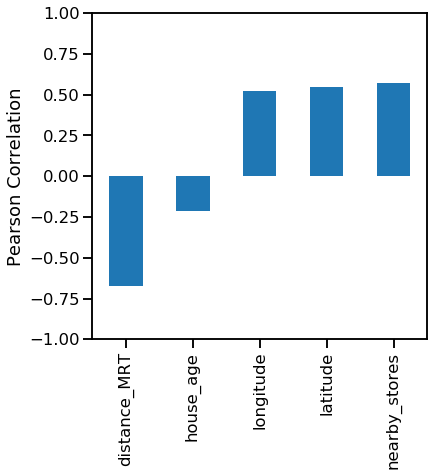

In [13]:
ax = corr.plot(kind='bar', figsize=(6,6))
ax.set(ylim=[-1,1], ylabel='Pearson Correlation');

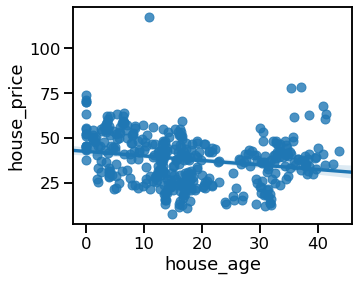

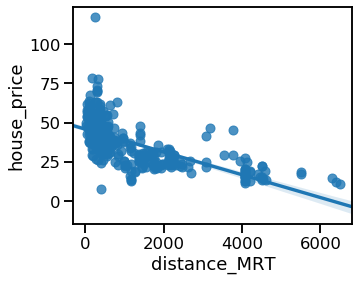

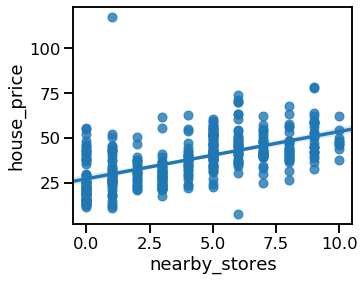

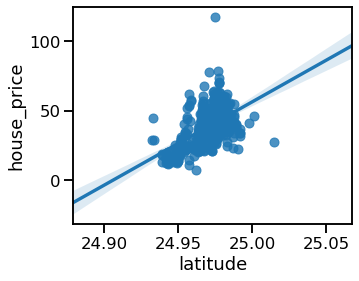

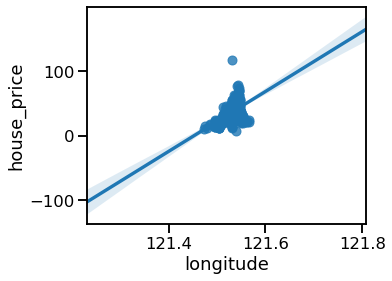

In [14]:
for col in cols[:-1]:
    fig, ax = plt.subplots(figsize=(5,4))
    sns.regplot(data=data, x=col, y='house_price', ax=ax);

Based on correlation analysis and above regression plots, the house price is positively correlated with the number of nearbby convenience stores and geographic coordinates, whereas it is negatively correlated with the house age and the distance to the nearest MRT station.

### Training Regression Machine Learning Models:

Three types of regression machine learning models were trained using the same cross-validation method to predict house prices. The following SciKit Learn functions were imported to train and build these regression ML models.


In [15]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

The dataset was split into 'X' containing feature variables for prediction and 'y' containing the target variable.

In [16]:
X = data.iloc[:, :-1]
y = data['house_price']
X.head()

,house_age,distance_MRT,nearby_stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


The KFold in SciKit Learn was used to split the dataset into four folds for cross validation analysis.

In [17]:
kf = KFold(shuffle=True, random_state=72018, n_splits=4)
kf.split(X)

<generator object _BaseKFold.split at 0x000000000E8704C8>

In [18]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  3  4  5  7  8 10 11 12 13] 310
Test index: [ 0  2  6  9 15 19 23 25 26 29] 104

Train index: [ 0  1  2  3  4  6  8  9 10 11] 310
Test index: [ 5  7 16 27 34 38 40 44 54 59] 104

Train index: [ 0  2  5  6  7  9 10 12 13 15] 311
Test index: [ 1  3  4  8 11 14 17 22 30 33] 103

Train index: [0 1 2 3 4 5 6 7 8 9] 311
Test index: [10 12 13 18 20 21 24 28 31 42] 103



### (1) Linear Regression Model:

**StandardScaler** in SciKit Learn was used to normalize the scale of variables for prediction. **LinearRegression** in SciKit Learn was used to train the linear regression model. **Pipeline** in SciKit Learn was used to build a pipeline object to execute both StandardScaler and LinearRegression functions.

In [19]:
# Build the Linear Regression Model
s = StandardScaler()
lr = LinearRegression()
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])
estimator

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

**Cross_val_predict** in SciKit Learn was used to perform cross-validation analysis to train the linear regression model.

**R2 score** and **RMSE (Root Mean Squared Error)** were analyzed to evaluate the prediction performance of the trained model.

In [20]:
# Perform the linear regression prediction and analyze the r2 score of predictions.
y_pred = cross_val_predict(estimator, X, y, cv=kf)
print('r2 score for the Linear Regression Model: {}'.format(round(r2_score(y, y_pred),6)))

r2 score for the Linear Regression Model: 0.557144


In [21]:
# Create a function to calculate RMSE
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [22]:
# Analyze root mean squared error of predictions
print('RMSE for the Linear Regression Model: {}'.format(round(rmse(y, y_pred),4)))

RMSE for the Linear Regression Model: 9.0438


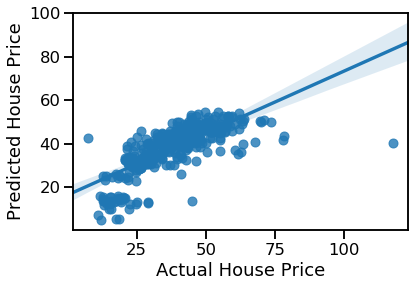

In [23]:
# Analyze predictions from the Linear Regression model with the regression plot
df = pd.DataFrame({'Actual House Price':y, 'Predicted House Price':y_pred})
sns.regplot(data=df, x='Actual House Price', y='Predicted House Price');

### (2) Polynomial Linear Regression Model:

In the second trained regression model, polynomial effects were added into the pipeline using **PolynomialFeatures** in SciKit Learn.


In [24]:
# Build the Polynomial Linear Regression Model
pf2 = PolynomialFeatures(degree=2)
s = StandardScaler()
lr = LinearRegression()

estimator2 = Pipeline([("make_higher_degree", pf2),
                       ("scaler", s),
                       ("regression", lr)])
estimator2

Pipeline(memory=None,
         steps=[('make_higher_degree',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [25]:
# Perform the polynomial regression prediction and analyze the r2 score of predictions.
y_pred2 = cross_val_predict(estimator2, X, y, cv=kf)
print('r2 score for the Polynomial Linear Regression Model: {}'.format(round(r2_score(y, y_pred2),6)))

r2 score for the Polynomial Linear Regression Model: 0.647095


In [26]:
# Analyze root mean squared error of predictions
print('RMSE for the Polynomial Linear Regression Model: {}'.format(round(rmse(y, y_pred2),4)))

RMSE for the Polynomial Linear Regression Model: 8.0733


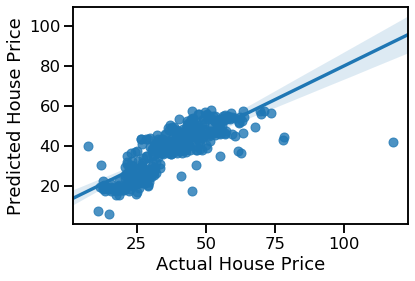

In [27]:
# Analyze predictions from the Polynomial Linear Regression Model with the regression plot
df2 = pd.DataFrame({'Actual House Price':y, 'Predicted House Price':y_pred2})
sns.regplot(data=df2, x='Actual House Price', y='Predicted House Price');

According to R2 score and RMSE, the prediction was significantly improved after polynomial effects were added in the regression ML model.

### (3) Regularization Regression  Models (Lasso):

**Lasso** in SciKit Learn was used to train regularization regression models. The models were trained in a range of alpha values using the cross-validation method for finding the best alpha value for Lasso Regression models.


In [28]:
# Build the Lasso Linear Regression Model and train it in a range of alpha values.
pf = PolynomialFeatures(degree=2)
s = StandardScaler()

scores = []
rms = []
alphas = np.geomspace(0.001, 10, 5)
for alpha in alphas:
    las = Lasso(alpha=alpha)
    
    estimator3 = Pipeline([
        ("make_higher_degree", pf),
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator3, X, y, cv = kf)    
    score = r2_score(y, predictions)    
    rm = rmse(y, predictions)    
    scores.append(score)    
    rms.append(rm)

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512.5682517242694, tolerance: 5.924117254838709
  positive)
C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.32584003674856, tolerance: 5.947939693548388
  positive)
C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.2585032933239, tolerance: 5.802611935691319
  positive)
C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

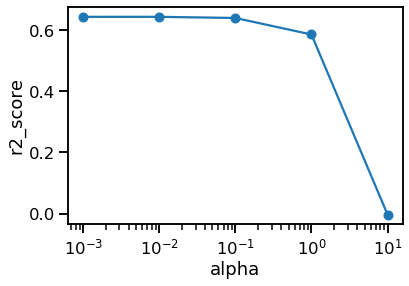

In [29]:
# Plot r2 scores vs alphas
plt.plot(alphas, scores, '-o')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.xscale('log');

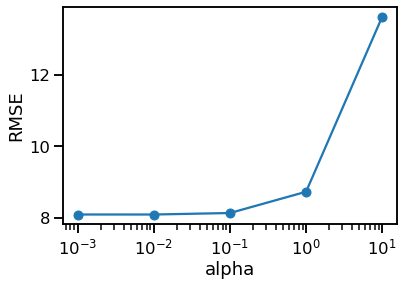

In [30]:
# Plot RMSE vs alphas
plt.plot(alphas, rms, '-o')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.xscale('log');

In [31]:
score_df1 = pd.DataFrame({'Alpha':alphas, 'R2 score':scores, 'RMSE':rms})
score_df1

,Alpha,R2 score,RMSE
0,0.001,0.644438,8.103607
1,0.010,0.644477,8.103162
2,0.100,0.640785,8.145134
3,1.000,0.586639,8.737469
4,10.000,-0.003285,13.612350


Based on above analyses, alpha = 0.01 provided the best trained Lasso regularization regression model.

In [32]:
# Set alpha=0.01 to train the Lasso Linear Regression Model
pf = PolynomialFeatures(degree=2)
las = Lasso(alpha=0.01)
s = StandardScaler()

estimator3 = Pipeline([
    ("make_higher_degree", pf),
    ("scaler", s),
    ("lasso_regression", las)])

y_pred3 = cross_val_predict(estimator3, X, y, cv = kf)    

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.501681106026808, tolerance: 5.924117254838709
  positive)
C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.296150521942764, tolerance: 5.802611935691319
  positive)
C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.120527722434417, tolerance: 5.252973807073954
  positive)


In [33]:
print('r2 score for the Lasso Linear Regression Model: {}'.format(round(r2_score(y, y_pred3),6)))
print('RMSE for the Lasso Linear Regression Model: {}'.format(round(rmse(y, y_pred3),4)))

r2 score for the Lasso Linear Regression Model: 0.644477
RMSE for the Lasso Linear Regression Model: 8.1032


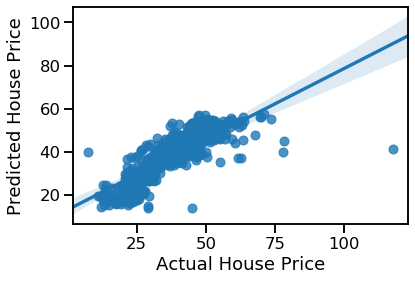

In [34]:
# Analyze predictions from the Lasso Linear Regression model with the regression plot
df3 = pd.DataFrame({'Actual House Price':y, 'Predicted House Price':y_pred3})
sns.regplot(data=df3, x='Actual House Price', y='Predicted House Price');

### (4) Regularization Regression  Models (Ridge):

**Ridge** in SciKit Learn was used to train regularization regression models. The models were trained in a range of alpha values using the cross-validation method for finding the best alpha value for Ridge Regression models.

In [35]:
# Build the Ridge Linear Regression Model and train it in a range of alpha values.
pf = PolynomialFeatures(degree=2)
s = StandardScaler()
alphas = np.geomspace(0.0000001, 0.01, 6)
scores=[]
rms=[]

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator4 = Pipeline([
        ("polynomial_features", pf),
        ("scaler", s),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator4, X, y, cv = kf)
    score = r2_score(y, predictions)
    rm = rmse(y, predictions)
    scores.append(score)
    rms.append(rm)

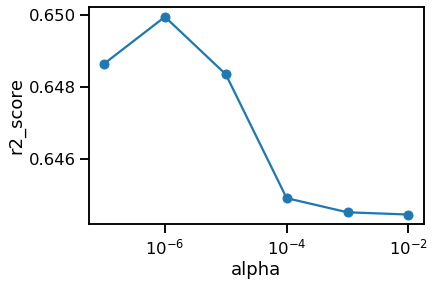

In [36]:
# Plot r2 scores vs alphas
plt.plot(alphas, scores, '-o')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.xscale('log');

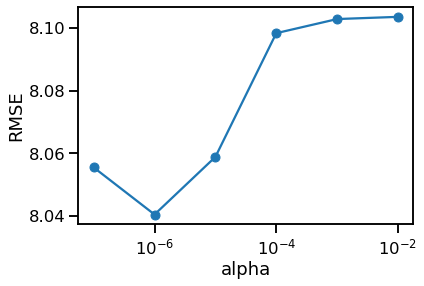

In [37]:
# Plot RMSE vs alphas
plt.plot(alphas, rms, '-o')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.xscale('log');

In [38]:
score_df2 = pd.DataFrame({'Alpha':alphas, 'R2 score':scores, 'RMSE':rms})
score_df2

,Alpha,R2 score,RMSE
0,1.000000e-07,0.648646,8.055510
1,1.000000e-06,0.649954,8.040503
2,1.000000e-05,0.648353,8.058871
3,1.000000e-04,0.644904,8.098299
4,1.000000e-03,0.644510,8.102794
5,1.000000e-02,0.644448,8.103497


The trained Ridge regression model using alpha=0.000001 provides the best predictions.

In [39]:
# Set alpha=0.000001 to train the Ridge Linear Regression Model
pf = PolynomialFeatures(degree=2)
s = StandardScaler()
ridge = Ridge(alpha=0.000001, max_iter=100000)

estimator4 = Pipeline([
    ("polynomial_features", pf),
    ("scaler", s),
    ("ridge_regression", ridge)])

y_pred4 = cross_val_predict(estimator4, X, y, cv = kf)

In [40]:
print('r2 score for the Ridge Linear Regression Model: {}'.format(round(r2_score(y, y_pred4),6)))
print('RMSE for the Ridge Linear Regression Model: {}'.format(round(rmse(y, y_pred4),4)))

r2 score for the Ridge Linear Regression Model: 0.649954
RMSE for the Ridge Linear Regression Model: 8.0405


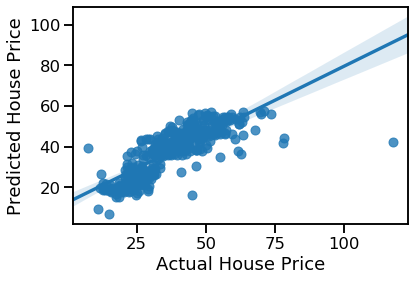

In [41]:
# Analyze predictions from the Ridge Linear Regression Model with the regression plot
df4 = pd.DataFrame({'Actual House Price':y, 'Predicted House Price':y_pred4})
sns.regplot(data=df4, x='Actual House Price', y='Predicted House Price');

In [42]:
# Summary of prediction performances of four different linear regression models
predictions = [y_pred, y_pred2, y_pred3, y_pred4]
r2_scores = []
RMSE = []

for pred in predictions:
    r2 = r2_score(y, pred)
    r2_scores.append(r2)
    err = rmse(y, pred)
    RMSE.append(err)

sum_df = pd.DataFrame({'R2 Score':r2_scores, 'RMSE':RMSE}, index=['Linear Regression Model',
                                                                  'Polynomial Linear Regression Model',
                                                                  'Lasso Linear Regression model',
                                                                  'Ridge Linear Regression model'])
sum_df

,R2 Score,RMSE
Linear Regression Model,0.557144,9.043823
Polynomial Linear Regression Model,0.647095,8.073278
Lasso Linear Regression model,0.644477,8.103162
Ridge Linear Regression model,0.649954,8.040503


### Conclusion:

According to R2 score and RMSE, the Ridge linear regression model using alpha=0.000001 is the best ML model for prediction house prices when compared to Lasso and other regression models.